### faire un premier test (gregression logistique) on trouve des performances nulles (fayez)


       Analyse du Biais, Variance et Erreur       

MSE : 2.2317
Biais : 1.9788
Variance : 0.2529
Precision : 0.2699


c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m


              Performances Globales               

Précision moyenne via validation croisée : 0.2690

Rapport de classification :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       141
           1       0.30      0.21      0.25       928
           2       0.30      0.36      0.33      1177
           3       0.35      0.14      0.20       984
           4       0.39      0.64      0.48      1268

    accuracy                           0.35      4498
   macro avg       0.27      0.27      0.25      4498
weighted avg       0.33      0.35      0.32      4498


Occurrences des classes dans 'AdoptionSpeed' :
 AdoptionSpeed
4    4197
2    4037
3    3259
1    3090
0     410
Name: count, dtype: int64


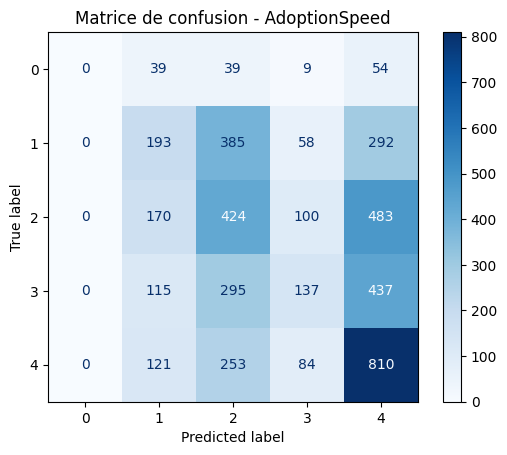


Matrice de confusion (valeurs absolues) :

     Prédit 0  Prédit 1  Prédit 2  Prédit 3  Prédit 4
Réel 0:       0       39       39        9       54
Réel 1:       0      193      385       58      292
Réel 2:       0      170      424      100      483
Réel 3:       0      115      295      137      437
Réel 4:       0      121      253       84      810


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp  
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


csv_file_path = 'data_clean.csv'  
df = pd.read_csv(csv_file_path)




df = df.drop(columns=['PetID', 'Quantity'])


features = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
            'Health', 'Fee', 'VideoAmt', 'PhotoAmt']
target = 'AdoptionSpeed'

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_lr = LogisticRegression(max_iter=1000, solver='lbfgs')


mse, bias, var = bias_variance_decomp(
    model_lr,
    X_train_scaled,
    y_train.values,
    X_test_scaled,
    y_test.values,
    loss='mse',
    num_rounds=200,
    random_seed=123
)


print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")


model_lr.fit(X_train_scaled, y_train)


y_pred = model_lr.predict(X_test_scaled)


precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision : {precision:.4f}")


cross_val_precisions = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='precision_macro')
print("\n" + "="*50)
print("Performances Globales".center(50))
print("="*50 + "\n")
print(f"Précision moyenne via validation croisée : {np.mean(cross_val_precisions):.4f}")


classification_rep = classification_report(y_test, y_pred)
print("\nRapport de classification :\n", classification_rep)


occurrences = df['AdoptionSpeed'].value_counts()
print("\nOccurrences des classes dans 'AdoptionSpeed' :\n", occurrences)


labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - AdoptionSpeed")
plt.show()


print("\nMatrice de confusion (valeurs absolues) :\n")
print("     " + "  ".join([f"Prédit {l}" for l in labels]))
for i, row in enumerate(cm):
    print(f"Réel {labels[i]}: " + "  ".join([f"{val:>7}" for val in row]))


### Apres multiplication de la classe 0 (fayez)


       Analyse du Biais, Variance et Erreur       

MSE : 3.6941
Biais : 3.3316
Variance : 0.3626
Precision : 0.2893

              Performances Globales               

Précision moyenne via validation croisée : 0.2945

Rapport de classification :
               precision    recall  f1-score   support

           0       0.28      0.35      0.31       966
           1       0.24      0.08      0.12       908
           2       0.29      0.27      0.28      1256
           3       0.32      0.13      0.18       958
           4       0.32      0.58      0.41      1271

    accuracy                           0.30      5359
   macro avg       0.29      0.28      0.26      5359
weighted avg       0.29      0.30      0.27      5359


Occurrences des classes dans 'AdoptionSpeed' :
 AdoptionSpeed
4    4197
2    4037
0    3280
3    3259
1    3090
Name: count, dtype: int64


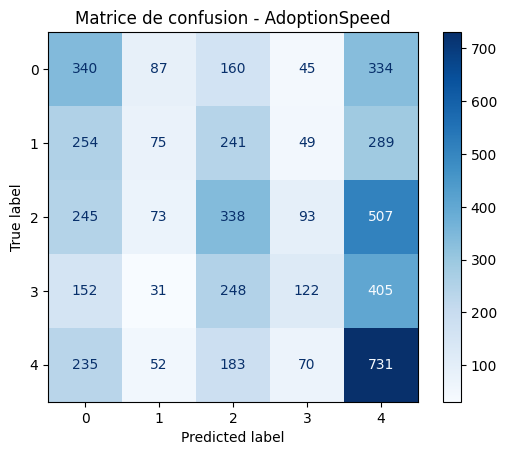


Matrice de confusion (valeurs absolues) :

     Prédit 0  Prédit 1  Prédit 2  Prédit 3  Prédit 4
Réel 0:     340       87      160       45      334
Réel 1:     254       75      241       49      289
Réel 2:     245       73      338       93      507
Réel 3:     152       31      248      122      405
Réel 4:     235       52      183       70      731


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Charger les données
csv_file_path = 'data_duplicated_class0.csv'  # Remplacez par votre chemin
df = pd.read_csv(csv_file_path)

# Supprimer les colonnes inutiles
df = df.drop(columns=['PetID', 'Quantity'])

# Définir les features et la cible
features = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3',
            'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
            'Health', 'Fee', 'VideoAmt', 'PhotoAmt']
target = 'AdoptionSpeed'

X = df[features]
y = df[target]

# Séparer les données en un ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle
model_lr = LogisticRegression(max_iter=1000, solver='lbfgs')

# Calcul du biais, de la variance et de l'erreur
mse, bias, var = bias_variance_decomp(
    model_lr,
    X_train_scaled,
    y_train.values,
    X_test_scaled,
    y_test.values,
    loss='mse',
    num_rounds=200,
    random_seed=123
)

# Résultats du biais-variance
print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")

# Entraînement du modèle
model_lr.fit(X_train_scaled, y_train)

# Prédictions
y_pred = model_lr.predict(X_test_scaled)

# Précision (multiclasse)
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision : {precision:.4f}")

# Précision moyenne via validation croisée
cross_val_precisions = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='precision_macro')
print("\n" + "="*50)
print("Performances Globales".center(50))
print("="*50 + "\n")
print(f"Précision moyenne via validation croisée : {np.mean(cross_val_precisions):.4f}")

# Rapport de classification
classification_rep = classification_report(y_test, y_pred)
print("\nRapport de classification :\n", classification_rep)

# Compter les occurrences de chaque classe
occurrences = df['AdoptionSpeed'].value_counts()
print("\nOccurrences des classes dans 'AdoptionSpeed' :\n", occurrences)

# Afficher la matrice de confusion (graphiquement)
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - AdoptionSpeed")
plt.show()

# Affichage de la matrice de confusion en texte brut
print("\nMatrice de confusion (valeurs absolues) :\n")
print("     " + "  ".join([f"Prédit {l}" for l in labels]))
for i, row in enumerate(cm):
    print(f"Réel {labels[i]}: " + "  ".join([f"{val:>7}" for val in row]))


### Arbre de décision Pb avec les bread ( donc faire 2 modele a chque fois selon le type ) ( Faizdev )

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import graphviz

# Chargement des données
df = pd.read_csv("data_clean.csv")

# Cible
y = df["AdoptionSpeed"]

# Variables explicatives
features = [
     'Age', 'Breed1', 'Breed2' , 'Type', 'Color1', 'Color2',
    'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
    'Health', 'Fee', 'PhotoAmt'
]
X = df[features].fillna(0)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement de l’arbre
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Prédictions
y_pred = tree.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualisation avec graphviz
dot_data = export_graphviz(
    tree,
    out_file=None, 
    feature_names=features,  
    class_names=['0', '1', '2', '3', '4'],
    filled=True,  
    rounded=True,  
    special_characters=True  
)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")  # Sauvegarde le fichier au format .pdf (ou .png selon les besoins)
graph.view()  # Affiche l'arbre dans une fenêtre interactive


Accuracy: 0.3751250416805602
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        92
           1       0.33      0.10      0.16       627
           2       0.32      0.55      0.40       806
           3       0.39      0.09      0.14       641
           4       0.44      0.68      0.53       833

    accuracy                           0.38      2999
   macro avg       0.30      0.28      0.25      2999
weighted avg       0.36      0.38      0.32      2999



c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Faiz ADENLE\Desktop\Love-my-pet AI\monenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

'decision_tree.pdf'


Dans notre analyse, nous avons utilisé **un arbre de décision simple** pour **visualiser les décisions prises par le modèle**, avant de passer à des modèles plus avancés comme **Gradient Boosting** ou **CatBoost**, qui reposent également sur des arbres.

Nous constatons que les **premiers nœuds** de l’arbre utilisent la variable **Breed1** (race de l’animal), comme *Breed1 ≤ 306.5*, alors que la variable **Type** (1 = chien, 2 = chat) n’apparaît qu’ensuite avec un test comme *Type ≤ 1.5*.

Cela pose plusieurs problèmes :

1. **Breed1 et Type sont fortement corrélés** : certaines races sont propres aux chiens, d’autres aux chats. L’arbre peut donc déduire le type d’animal **uniquement à partir de la race**, sans utiliser explicitement la variable Type.

2. **Breed1 est un identifiant arbitraire**. Son encodage numérique n’a pas de sens ordinal. Le modèle apprend donc des règles biaisées, basées sur l’ordre artificiel des races.

3. **Type est une variable binaire claire**, mais elle est utilisée trop tard. Or, séparer les chiens des chats en premier aurait permis une meilleure spécialisation des règles ensuite.

C’est pourquoi nous avons choisi de : 

#### Colonnes spécifiques pour chats et chiens, pénalisées à -1000
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'], -1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'], -1000)

#### Suppression des colonnes inutiles
df = df.drop(['Breed1', 'Breed2'], axis=1)

### Gradient boost Combinaison : (0,1,2)(3,4)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Meilleurs hyperparamètres : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

📊 Précision moyenne CV (macro) : 0.6470

🌍 Résultats globaux (chiens + chats) :
Précision : 0.6636432350718064
              precision    recall  f1-score   support

           0       0.63      0.70      0.67      1508
           1       0.66      0.59      0.62      1491

    accuracy                           0.65      2999
   macro avg       0.65      0.65      0.65      2999
weighted avg       0.65      0.65      0.65      2999


Analyse du Biais, Variance et Erreur - Modèle Optimisé

MSE : 0.3549
Biais : 0.2996
Variance : 0.0553


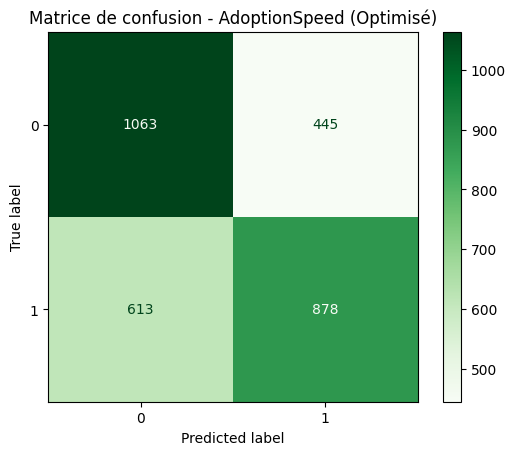

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import bias_variance_decomp

# Chargement des données
df = pd.read_csv("data_clean.csv")

# Fusion des classes : 0-1-2 → 0, 3-4 → 1
df["AdoptionSpeedBinary"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [0, 1, 2] else 1)

# Créer la colonne PureBreed
df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)

# Colonnes spécifiques pour chats et chiens, pénalisées à -1000
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'], -1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'], -1000)

# Suppression des colonnes inutiles
df = df.drop(['Breed1', 'Breed2'], axis=1)

# Features sélectionnées
features = ['Type', 'Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien',
            'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
            'Sterilized', 'PhotoAmt', 'Fee', 'PureBreed', 'VideoAmt', 'Health']

X = df[features].fillna(0)
y = df["AdoptionSpeedBinary"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Application du StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paramètres pour Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1]
}

# Validation croisée (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_
print(f"\n✅ Meilleurs hyperparamètres : {grid_search.best_params_}")

# Validation croisée
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='precision_macro')
precision_macro_cv = np.mean(cv_scores)
print(f"\n📊 Précision moyenne CV (macro) : {precision_macro_cv:.4f}")

# Évaluation test
y_pred = best_model.predict(X_test_scaled)
print("\n🌍 Résultats globaux (chiens + chats) :")
print("Précision :", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Analyse biais-variance
mse, bias, var = bias_variance_decomp(
    best_model,
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    loss='mse', num_rounds=200, random_seed=123
)

print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur - Modèle Optimisé".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")

# Matrice de confusion
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - AdoptionSpeed (Optimisé)")
plt.show()


Le modèle pour les chiens montre un **sous-apprentissage**, avec un biais élevé (**0.3039**) et une faible variance (**0.0580**). La précision est de **0.696**, et le recall de **0.65** indique qu’une partie des cas d’adoption rapide n’est pas bien identifiée, ce qui limite la généralisation du modèle. L’erreur MSE de **0.3619** confirme que le modèle a des difficultés à s’adapter aux données.  

Le modèle pour les chats est également **en sous-apprentissage**, avec un biais encore plus marqué (**0.3092**) et une faible variance (**0.0576**). La précision est de **0.624**, et le recall de **0.52** montre qu’il ne détecte pas bien les cas d’adoption rapide. L’erreur MSE de **0.3668** souligne qu’il **généralise moins bien que celui des chiens**.  

Les deux modèles présentent un **biais élevé et une faible variance**, ce qui indique qu’ils **manquent de flexibilité et de complexité** pour capturer efficacement les tendances d’adoption.

### Gradient boost Combinaison : (1,2)(3,4) on suprime la classe 0

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

📊 Précision moyenne CV (macro) : 0.6452

🌍 Résultats globaux (chiens + chats) :
Précision : 0.6637233259749816
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1426
           1       0.66      0.60      0.63      1491

    accuracy                           0.64      2917
   macro avg       0.64      0.64      0.64      2917
weighted avg       0.64      0.64      0.64      2917


Analyse du Biais, Variance et Erreur - Modèle Optimisé

MSE : 0.3649
Biais : 0.3050
Variance : 0.0599


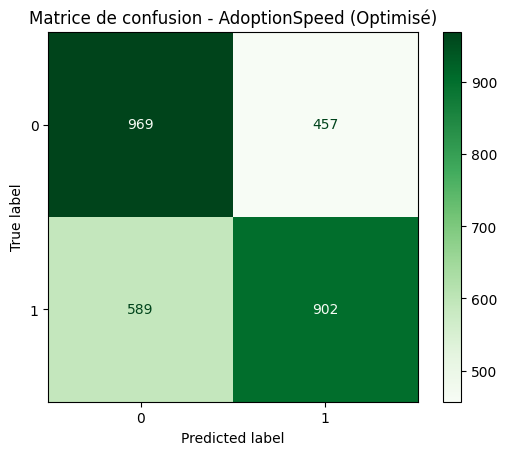

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import bias_variance_decomp

# Chargement des données
df = pd.read_csv("data_clean.csv")

df = df[df["AdoptionSpeed"] != 0]
df["AdoptionSpeedBinary"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [1, 2] else 1)

# Créer la colonne PureBreed
df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)

# Colonnes spécifiques pour chats et chiens, pénalisées à -1000
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'], -1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'], -1000)

# Suppression des colonnes inutiles
df = df.drop(['Breed1', 'Breed2'], axis=1)

# Features sélectionnées
features = ['Type', 'Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien',
            'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
            'Sterilized', 'PhotoAmt', 'Fee', 'PureBreed', 'VideoAmt', 'Health']

X = df[features].fillna(0)
y = df["AdoptionSpeedBinary"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Application du StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paramètres pour Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1]
}

# Validation croisée (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_
print(f"\n✅ Meilleurs hyperparamètres : {grid_search.best_params_}")

# Validation croisée
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='precision_macro')
precision_macro_cv = np.mean(cv_scores)
print(f"\n📊 Précision moyenne CV (macro) : {precision_macro_cv:.4f}")

# Évaluation test
y_pred = best_model.predict(X_test_scaled)
print("\n🌍 Résultats globaux (chiens + chats) :")
print("Précision :", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Analyse biais-variance
mse, bias, var = bias_variance_decomp(
    best_model,
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    loss='mse', num_rounds=200, random_seed=123
)

print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur - Modèle Optimisé".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")

# Matrice de confusion
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - AdoptionSpeed (Optimisé)")
plt.show()


Le modèle pour les chiens montre un **sous-apprentissage**, avec un biais élevé (**0.2915**) et une faible variance (**0.0663**). La précision de **0.696** est correcte, mais le recall de **0.66** indique qu’il manque certains cas d’adoption rapide, ce qui limite sa capacité de généralisation. L’erreur MSE de **0.3578** reste élevée, confirmant que le modèle a du mal à bien s’adapter aux données.  

Le modèle pour les chats est également **en sous-apprentissage**, avec un biais encore plus marqué (**0.3092**) et une variance faible (**0.0576**). Sa précision de **0.634** est légèrement meilleure, mais le recall de **0.55** montre qu’il ne détecte pas bien les cas d’adoption rapide. L’erreur MSE de **0.3668** reste plus haute que celle du modèle des chiens, indiquant qu’il **généralise encore moins bien**.  

Les deux modèles montrent un **biais élevé et une variance faible**, ce qui confirme qu’ils **manquent de flexibilité et de complexité** pour capter efficacement les tendances d’adoption.


### Ajout sentiment : (0,1,2)(3,4)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}

📊 Précision moyenne CV (macro) : 0.6461

🌍 Résultats globaux (chiens + chats) :
Précision : 0.6604717655468192
              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1426
           1       0.66      0.62      0.64      1491

    accuracy                           0.64      2917
   macro avg       0.64      0.64      0.64      2917
weighted avg       0.64      0.64      0.64      2917


Analyse du Biais, Variance et Erreur - Modèle Optimisé

MSE : 0.3634
Biais : 0.2975
Variance : 0.0660


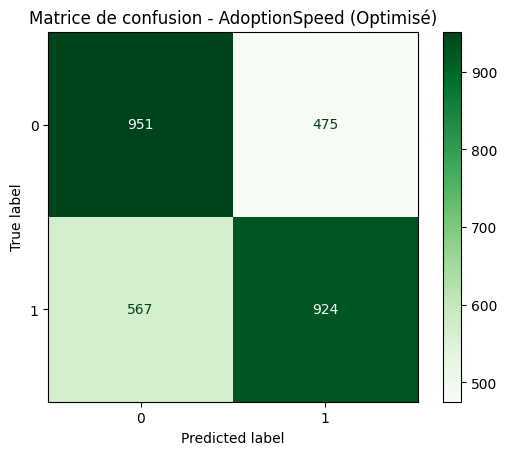

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from mlxtend.evaluate import bias_variance_decomp

# Chargement des données
df = pd.read_csv("data_clean.csv")
csv_file_path_sent = 'sentiment.csv'
sentiment_df = pd.read_csv(csv_file_path_sent)

# Fusion des données sentimentales
df = df.merge(sentiment_df[['PetID', 'pos', 'neg', 'neu', 'compound']], on='PetID', how='left')

df["AdoptionSpeedBinary"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [0 ,1, 2] else 1)

df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'], -1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'], -1000)
df = df.drop(['Breed1', 'Breed2'], axis=1)

# Sélection des features
features = ['Type', 'Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien',
            'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
            'Sterilized', 'PhotoAmt', 'Fee', 'PureBreed', 'VideoAmt', 'Health', 
            'pos', 'neg', 'neu']  # + sentiments

X = df[features].fillna(0)
y = df["AdoptionSpeedBinary"]

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversion y_train et y_test en numpy arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Paramètres pour GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Recherche d'hyperparamètres
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"\n✅ Meilleurs hyperparamètres : {grid_search.best_params_}")

# Validation croisée
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='precision_macro')
precision_macro_cv = np.mean(cv_scores)
print(f"\n📊 Précision moyenne CV (macro) : {precision_macro_cv:.4f}")

# Prédictions
y_pred = best_model.predict(X_test)

print("\n🌍 Résultats globaux (chiens + chats) :")
print("Précision :", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Analyse biais-variance
mse, bias, var = bias_variance_decomp(
    best_model,
    X_train, y_train,
    X_test, y_test,
    loss='mse', num_rounds=200, random_seed=123
)

print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur - Modèle Optimisé".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")

# Matrice de confusion
labels = sorted(np.unique(y_test))
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - AdoptionSpeed (Optimisé)")
plt.show()


### Exporttation du meilleur model

Fitting 5 folds for each of 12 candidates, totalling 60 fits

✅ Meilleurs hyperparamètres : {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

📊 Précision moyenne CV (macro) : 0.6452

🌍 Résultats globaux (chiens + chats) :
Précision : 0.6637233259749816
              precision    recall  f1-score   support

           0       0.62      0.68      0.65      1426
           1       0.66      0.60      0.63      1491

    accuracy                           0.64      2917
   macro avg       0.64      0.64      0.64      2917
weighted avg       0.64      0.64      0.64      2917


Analyse du Biais, Variance et Erreur - Modèle Optimisé

MSE : 0.3649
Biais : 0.3050
Variance : 0.0599


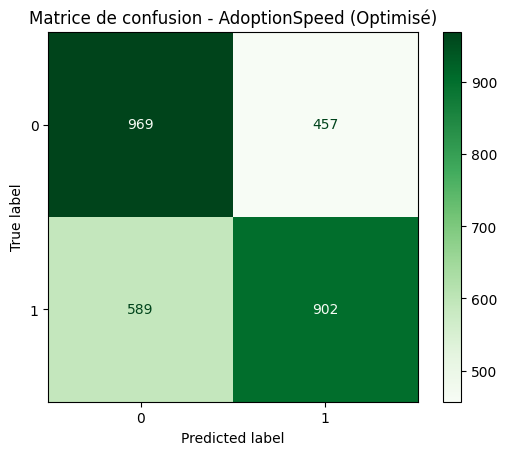


✅ Scaler et modèle exportés avec succès !


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.evaluate import bias_variance_decomp

# Chargement des données
df = pd.read_csv("data_clean.csv")

df = df[df["AdoptionSpeed"] != 0]
df["AdoptionSpeedBinary"] = df["AdoptionSpeed"].apply(lambda x: 0 if x in [1, 2] else 1)

# Créer la colonne PureBreed
df['PureBreed'] = df['Breed2'].apply(lambda x: 0 if x != 0 else 1)

# Colonnes spécifiques pour chats et chiens, pénalisées à -1000
df['breed1_chat'] = np.where(df['Type'] == 2, df['Breed1'], -1000)
df['breed1_chien'] = np.where(df['Type'] == 1, df['Breed1'], -1000)
df['breed2_chat'] = np.where(df['Type'] == 2, df['Breed2'], -1000)
df['breed2_chien'] = np.where(df['Type'] == 1, df['Breed2'], -1000)

# Suppression des colonnes inutiles
df = df.drop(['Breed1', 'Breed2'], axis=1)

# Features sélectionnées
features = ['Type', 'Age', 'breed1_chat', 'breed1_chien', 'breed2_chat', 'breed2_chien',
            'Color1', 'Color2', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
            'Sterilized', 'PhotoAmt', 'Fee', 'PureBreed', 'VideoAmt', 'Health']

X = df[features].fillna(0)
y = df["AdoptionSpeedBinary"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Application du StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paramètres pour Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1]
}

# Validation croisée (StratifiedKFold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='precision',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Meilleur modèle
best_model = grid_search.best_estimator_
print(f"\n✅ Meilleurs hyperparamètres : {grid_search.best_params_}")

# Validation croisée
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=cv, scoring='precision_macro')
precision_macro_cv = np.mean(cv_scores)
print(f"\n📊 Précision moyenne CV (macro) : {precision_macro_cv:.4f}")

# Évaluation test
y_pred = best_model.predict(X_test_scaled)
print("\n🌍 Résultats globaux (chiens + chats) :")
print("Précision :", precision_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Analyse biais-variance
mse, bias, var = bias_variance_decomp(
    best_model,
    X_train_scaled, y_train.values,
    X_test_scaled, y_test.values,
    loss='mse', num_rounds=200, random_seed=123
)

print("\n" + "="*50)
print("Analyse du Biais, Variance et Erreur - Modèle Optimisé".center(50))
print("="*50 + "\n")
print(f"MSE : {mse:.4f}")
print(f"Biais : {bias:.4f}")
print(f"Variance : {var:.4f}")

# Matrice de confusion
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Greens')
plt.title("Matrice de confusion - AdoptionSpeed (Optimisé)")
plt.show()


import joblib

# Sauvegarde du scaler
joblib.dump(scaler, 'scaler_v.pkl')

# Sauvegarde du meilleur modèle
joblib.dump(best_model, 'model_v.pkl')

print("\n✅ Scaler et modèle exportés avec succès !")
